In [ ]:
# Import relevant libaries

import os 
import datetime 
import re

import requests
import time
from bs4 import BeautifulSoup
from collections import defaultdict, Counter 
import random

# Additional libraries

import shutil
import pprint
import numpy as np
import pandas as pd
import json
from json import loads, dumps
import string


import seaborn as sns
import plotly.express as px

from collections import Counter, defaultdict
from string import punctuation
from nltk.corpus import stopwords
from nltk.metrics import ConfusionMatrix

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from random import randint

from textblob import TextBlob

from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline

from tqdm.auto import tqdm

import pyLDAvis
import pyLDAvis.lda_model
import pyLDAvis.gensim_models

import pyLDAvis.lda_model
pyLDAvis.lda_model.prepare

from wordcloud import WordCloud
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# nlp = spacy.load('en_core_web_sm')

### Load in Cleaned and Tokenized Data

In [2]:
# Load in using pandas

airlines_df = pd.read_json("tokenized_reviews.json")

display(airlines_df)


airline_link           airline_name  \
0  https://www.tripadvisor.com/Airline_Review-d87...               Emirates   
1  https://www.tripadvisor.com/Airline_Review-d10...         LATAM Airlines   
2  https://www.tripadvisor.com/Airline_Review-d87...              Lufthansa   
3  https://www.tripadvisor.com/Airline_Review-d87...             Air Canada   
4  https://www.tripadvisor.com/Airline_Review-d87...               Aeroflot   
5  https://www.tripadvisor.com/Airline_Review-d87...         Cathay Pacific   
6  https://www.tripadvisor.com/Airline_Review-d87...          Copa Airlines   
7  https://www.tripadvisor.com/Airline_Review-d87...       Virgin Australia   
8  https://www.tripadvisor.com/Airline_Review-d87...              Air China   
9  https://www.tripadvisor.com/Airline_Review-d87...  South African Airways   

  airline_reviews  review_count               region  Rating  \
0  64,164 reviews         64164          Middle East     4.0   
1  40,974 reviews         40974        South America     3.5   
2  40,755 reviews         40755               Europe     3.5   
3  29,772 reviews         29772        North America     3.0   
4  20,697 reviews         20697  Indian Subcontinent     4.0   
5  16,646 reviews         16646                 Asia     4.0   
6  13,293 reviews         13293      Central America     3.5   
7  11,965 reviews         11965              Pacific     3.5   
8   6,005 reviews          6005                China     3.0   
9   4,885 reviews          4885               Africa     3.5   

                                        Review_Title  \
0  [Worst airline I've travelled with, Disgusting...   
1  [LATAM is changing, for the bad..., The worst ...   
2  [Terrible boarding process, Not as good as exp...   
3  [very average, delay delay delay, Terrible exp...   
4  [Day 320: Repayment still did not work out, WO...   
5  [Bad food service / Inhumane cabin crew, Never...   
6  [COPA- Horrible Company Policies, Very disappo...   
7  [Sitting in a sauna, Canceled Again, If you th...   
8  [Crappiest offboard service so far, Great trip...   
9  [Do not use this airline, Pathetic, Happy Cust...   

                                         Review_Text  \
0  [Would never fly with Emirates again. Planes o...   
1  [Our  was delayed more than an hour, boarding ...   
2  [Terrible boarding process, switching from Uni...   
3  [Very average service. Apart from slightly mor...   
4  [To my great surprise, I received the free, wo...   
5  [The cabin crew are inhumane. They treat India...   
6  [Massive protests/roadblocks throughout Panama...   
7  [Upon boarding the aircraft the ac wasn’t work...   
8  [Crappiest offboard service so far. Phone serv...   
9  [We will never use SAA again. Our  s to and fr...   

                                        title_tokens  \
0  [worst, airline, ive, travelled, disgusting, a...   
1  [latam, changing, bad, worst, customer, servic...   
2  [terrible, boarding, process, good, expected, ...   
3  [average, delay, delay, delay, terrible, exper...   
4  [day, 320, repayment, still, work, worst, comp...   
5  [bad, food, service, inhumane, cabin, crew, ne...   
6  [copa, horrible, company, policies, disappoint...   
7  [sitting, sauna, canceled, thinks, spent, 338,...   
8  [crappiest, offboard, service, far, great, tri...   
9  [use, airline, pathetic, happy, customer’s, av...   

                                      summary_tokens  
0  [would, never, fly, emirates, planes, outdated...  
1  [delayed, hour, boarding, total, mess, groups,...  
2  [terrible, boarding, process, switching, unite...  
3  [average, service, apart, slightly, leg, room,...  
4  [great, surprise, received, free, worryfree, a...  
5  [cabin, crew, inhumane, treat, indians, second...  
6  [massive, protestsroadblocks, throughout, pana...  
7  [upon, boarding, aircraft, ac, wasn’t, working...  
8  [crappiest, offboard, service, far, phone, ser...  
9  [never, use, saa, jo’burg, victoria, falls, de...

### Word Lemmatization

In [3]:
# Function for word lemmatization

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

# Apply function above

airlines_df['title_lemma'] = airlines_df['title_tokens'].apply(lambda x: word_lemmatizer(x))
airlines_df['summary_lemma'] = airlines_df['summary_tokens'].apply(lambda x: word_lemmatizer(x))

# Convert lemmatized data into string

airlines_df['title_lemma_str'] = [' '.join(map(str,l)) for l in airlines_df['title_lemma']]
airlines_df['summary_lemma_str'] = [' '.join(map(str,l)) for l in airlines_df['summary_lemma']]


airlines_df.head()

airline_link    airline_name  \
0  https://www.tripadvisor.com/Airline_Review-d87...        Emirates   
1  https://www.tripadvisor.com/Airline_Review-d10...  LATAM Airlines   
2  https://www.tripadvisor.com/Airline_Review-d87...       Lufthansa   
3  https://www.tripadvisor.com/Airline_Review-d87...      Air Canada   
4  https://www.tripadvisor.com/Airline_Review-d87...        Aeroflot   

  airline_reviews  review_count               region  Rating  \
0  64,164 reviews         64164          Middle East     4.0   
1  40,974 reviews         40974        South America     3.5   
2  40,755 reviews         40755               Europe     3.5   
3  29,772 reviews         29772        North America     3.0   
4  20,697 reviews         20697  Indian Subcontinent     4.0   

                                        Review_Title  \
0  [Worst airline I've travelled with, Disgusting...   
1  [LATAM is changing, for the bad..., The worst ...   
2  [Terrible boarding process, Not as good as exp...   
3  [very average, delay delay delay, Terrible exp...   
4  [Day 320: Repayment still did not work out, WO...   

                                         Review_Text  \
0  [Would never fly with Emirates again. Planes o...   
1  [Our  was delayed more than an hour, boarding ...   
2  [Terrible boarding process, switching from Uni...   
3  [Very average service. Apart from slightly mor...   
4  [To my great surprise, I received the free, wo...   

                                        title_tokens  \
0  [worst, airline, ive, travelled, disgusting, a...   
1  [latam, changing, bad, worst, customer, servic...   
2  [terrible, boarding, process, good, expected, ...   
3  [average, delay, delay, delay, terrible, exper...   
4  [day, 320, repayment, still, work, worst, comp...   

                                      summary_tokens  \
0  [would, never, fly, emirates, planes, outdated...   
1  [delayed, hour, boarding, total, mess, groups,...   
2  [terrible, boarding, process, switching, unite...   
3  [average, service, apart, slightly, leg, room,...   
4  [great, surprise, received, free, worryfree, a...   

                                         title_lemma  \
0  [worst, airline, ive, travelled, disgusting, a...   
1  [latam, changing, bad, worst, customer, servic...   
2  [terrible, boarding, process, good, expected, ...   
3  [average, delay, delay, delay, terrible, exper...   
4  [day, 320, repayment, still, work, worst, comp...   

                                       summary_lemma  \
0  [would, never, fly, emirate, plane, outdated, ...   
1  [delayed, hour, boarding, total, mess, group, ...   
2  [terrible, boarding, process, switching, unite...   
3  [average, service, apart, slightly, leg, room,...   
4  [great, surprise, received, free, worryfree, a...   

                                     title_lemma_str  \
0  worst airline ive travelled disgusting alleged...   
1  latam changing bad worst customer service expe...   
2  terrible boarding process good expected pathet...   
3  average delay delay delay terrible experience ...   
4  day 320 repayment still work worst company eve...   

                                   summary_lemma_str  
0  would never fly emirate plane outdated old was...  
1  delayed hour boarding total mess group promptl...  
2  terrible boarding process switching united luf...  
3  average service apart slightly leg room servic...  
4  great surprise received free worryfree aeroflo...

### Sentiment Analysis

In [4]:
# Calculate sentiment based on lemmatizated data

airlines_df['title_sentiment'] = airlines_df['title_lemma_str'].apply(
    lambda x: TextBlob(x).sentiment.polarity)
airlines_df['summary_sentiment'] = airlines_df['summary_lemma_str'].apply(
    lambda x: TextBlob(x).sentiment.polarity)

airlines_df.head()

airline_link    airline_name  \
0  https://www.tripadvisor.com/Airline_Review-d87...        Emirates   
1  https://www.tripadvisor.com/Airline_Review-d10...  LATAM Airlines   
2  https://www.tripadvisor.com/Airline_Review-d87...       Lufthansa   
3  https://www.tripadvisor.com/Airline_Review-d87...      Air Canada   
4  https://www.tripadvisor.com/Airline_Review-d87...        Aeroflot   

  airline_reviews  review_count               region  Rating  \
0  64,164 reviews         64164          Middle East     4.0   
1  40,974 reviews         40974        South America     3.5   
2  40,755 reviews         40755               Europe     3.5   
3  29,772 reviews         29772        North America     3.0   
4  20,697 reviews         20697  Indian Subcontinent     4.0   

                                        Review_Title  \
0  [Worst airline I've travelled with, Disgusting...   
1  [LATAM is changing, for the bad..., The worst ...   
2  [Terrible boarding process, Not as good as exp...   
3  [very average, delay delay delay, Terrible exp...   
4  [Day 320: Repayment still did not work out, WO...   

                                         Review_Text  \
0  [Would never fly with Emirates again. Planes o...   
1  [Our  was delayed more than an hour, boarding ...   
2  [Terrible boarding process, switching from Uni...   
3  [Very average service. Apart from slightly mor...   
4  [To my great surprise, I received the free, wo...   

                                        title_tokens  \
0  [worst, airline, ive, travelled, disgusting, a...   
1  [latam, changing, bad, worst, customer, servic...   
2  [terrible, boarding, process, good, expected, ...   
3  [average, delay, delay, delay, terrible, exper...   
4  [day, 320, repayment, still, work, worst, comp...   

                                      summary_tokens  \
0  [would, never, fly, emirates, planes, outdated...   
1  [delayed, hour, boarding, total, mess, groups,...   
2  [terrible, boarding, process, switching, unite...   
3  [average, service, apart, slightly, leg, room,...   
4  [great, surprise, received, free, worryfree, a...   

                                         title_lemma  \
0  [worst, airline, ive, travelled, disgusting, a...   
1  [latam, changing, bad, worst, customer, servic...   
2  [terrible, boarding, process, good, expected, ...   
3  [average, delay, delay, delay, terrible, exper...   
4  [day, 320, repayment, still, work, worst, comp...   

                                       summary_lemma  \
0  [would, never, fly, emirate, plane, outdated, ...   
1  [delayed, hour, boarding, total, mess, group, ...   
2  [terrible, boarding, process, switching, unite...   
3  [average, service, apart, slightly, leg, room,...   
4  [great, surprise, received, free, worryfree, a...   

                                     title_lemma_str  \
0  worst airline ive travelled disgusting alleged...   
1  latam changing bad worst customer service expe...   
2  terrible boarding process good expected pathet...   
3  average delay delay delay terrible experience ...   
4  day 320 repayment still work worst company eve...   

                                   summary_lemma_str  title_sentiment  \
0  would never fly emirate plane outdated old was...        -0.057960   
1  delayed hour boarding total mess group promptl...        -0.359934   
2  terrible boarding process switching united luf...        -0.314962   
3  average service apart slightly leg room servic...        -0.436486   
4  great surprise received free worryfree aeroflo...         0.443247   

   summary_sentiment  
0           0.129412  
1           0.025050  
2          -0.029266  
3          -0.098034  
4           0.317060

*Plot Overall Sentiment Distribution in Dataset*

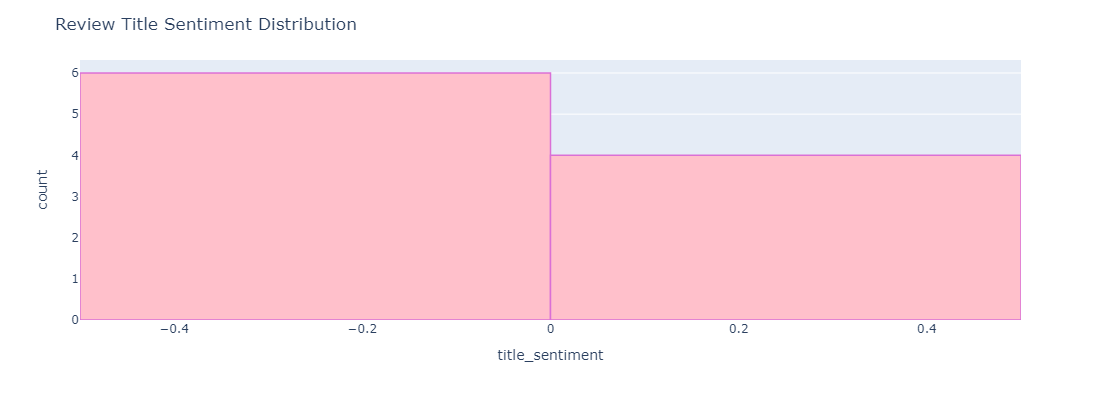

In [5]:
# Title Sentiment

fig2 = px.histogram(airlines_df, x="title_sentiment", width=800, height=400)
fig2.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig2.update_layout(title_text='Review Title Sentiment Distribution')
fig2.show()

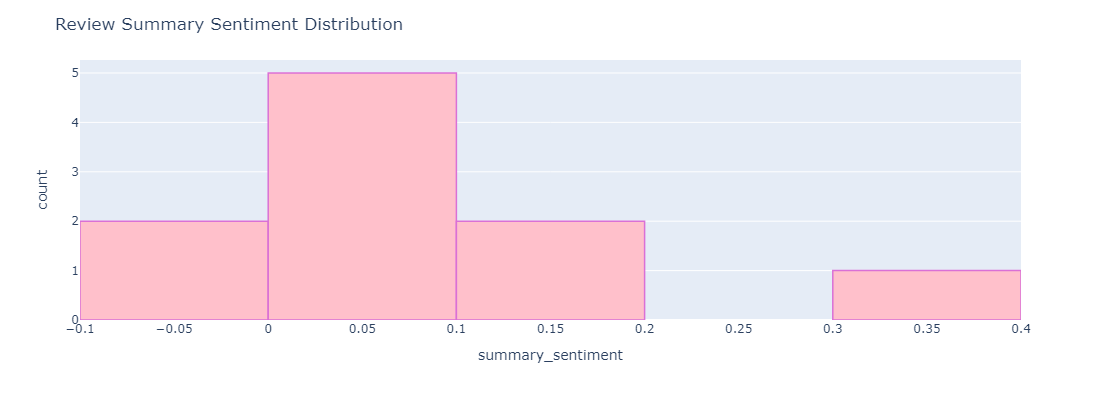

In [6]:
# Review Summary Sentiment

fig3 = px.histogram(airlines_df, x="summary_sentiment",  width=800, height=400)
fig3.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig3.update_layout(title_text='Review Summary Sentiment Distribution')
fig3.show()

Based on the sentiment distribution histograms above, the Review Titles seem to depict a uniform distribution. This makes sense because of the lack of words titles tend to have, making it harder to properly gauge sentiment. The Review Summaries show a bit more diverse sentiment among customers. for all of the reviews. Generally, the sentiment seems to be neutral, but sways more towards the positive end when examining all present reviews within the dataset.

### Topic Modeling

In [7]:
tfidf_summary_vectorizer = TfidfVectorizer(min_df = 3, max_df=0.7)
tfidf_summary_vectors = tfidf_summary_vectorizer.fit_transform(airlines_df['summary_lemma_str'])
tfidf_summary_vectors.shape
tfidf_summary_vectors

<10x876 sparse matrix of type '<class 'numpy.float64'>'
	with 3848 stored elements in Compressed Sparse Row format>

In [8]:
count_summary_vectorizer = CountVectorizer(min_df = 3, max_df=0.7)
count_summary_vectors = count_summary_vectorizer.fit_transform(airlines_df['summary_lemma_str'])
count_summary_vectors.shape
count_summary_vectors

<10x876 sparse matrix of type '<class 'numpy.int64'>'
	with 3848 stored elements in Compressed Sparse Row format>

The count vector transformed the texts of the 10 different categories into a vector based on the words available in all of the airline reviews. The TF-IDF vector transformed the same texts into vectors using weighted calculations of those frequencies, emphasizing word importance. This resulted in the storage of 3,847 elements in the tfidf_text_vectors and count_text_vectors. The min_df was initially set to 1, implying that none of the terms provided should be ignored. Setting the min_df to 3 instructs the code to ignore terms that appear in less than 3 reviews. The max_df ignores terms that appear too frequently, in our case that is terms that appear more than 70% of the time.


In [9]:
# Function to display topics and top words in different models

def display_topics(model, features, no_top_words=5):
    for topic, word_vector in enumerate(model.components_):
        word_list = []

        total = word_vector.sum()
        largest = word_vector.argsort()[::-1]
        print("\nTopic %2d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], word_vector[largest[i]]*100.0/total))

*NMF Model*

In [25]:
# Generate 10 topics using NMF

nmf_summary_model = NMF(n_components=5, random_state=42)
W_summary_matrix = nmf_summary_model.fit_transform(tfidf_summary_vectors)
H_summary_matrix = nmf_summary_model.components_

In [26]:
# Display NMF topics

display_topics(nmf_summary_model, tfidf_summary_vectorizer.get_feature_names_out())


Topic  0
 china (1.52)
 meal (0.91)
 clean (0.86)
 airway (0.62)
 comfort (0.61)

Topic  1
 canada (8.08)
 toronto (2.50)
 montreal (1.15)
 lady (1.03)
 carryon (0.85)

Topic  2
 emirate (10.07)
 dubai (4.66)
 travelling (0.99)
 journey (0.67)
 smile (0.61)

Topic  3
 copa (6.95)
 panama (4.36)
 city (1.54)
 fare (0.99)
 horrible (0.90)

Topic  4
 hong (1.82)
 kong (1.82)
 brisbane (1.53)
 australia (1.53)
 sydney (1.48)


Based on the 10 topics generated by the NMF model, it is relatively clear which Topics belong to which airline. Using this airline knowledge, the regions of the airline can be determined. The following expands on the topics displayed above:

Topic 0: It is tough to infer which region or airline this topic belongs to. The top 5 terms are "comfort", "thanks", "clean", "attentive", and "professionsal". All that we can really gather from this is that the reviews are about a top tier airlines. 

Topic 1: This topic mentions "canada", "montreal", "toronto", and "vancouver". This terminology is clearly related to Air Canada or travel in Canada in general. These reviews are likely for travel within the North America region.

Topic 2: This topic mentions "emirate" and "dubai", hinting at Emirates Airlines. Dubai is perhaps the most popular airport in the Middle East, pointing this topic towards that region.

Topic 3: This topic mentions "copa", suggesting Copa Airline reviews are present. The terms "panama" and "city" probably refer to reviews regarding Panama City, pointing to travel reviews on flights in Central America. Other than that we can only gauge that passengers are not necessarily satisfied with Copa Airlines due to the term "horrible".

Topic 4: This topic highlights the terms "brisbane", "australia", and "sydney" implying the reviews are regarding travel in the region of Australia. Surprisingly, "qantas" is a popular term as well, even though reviews for this airline are not included in the dataset. It is possible customers are comparing Virgin Australia and Qantas or discussing flights booked with Qantas. The "toilet" on the aircrafts is a hot topic of conversation as well.

Topic 5: With the term "china" landing at the top, it is possible this topic belongs to the region of China, for which the dataset holds Air China reviews. The terms "fare", "airbus", and "english" are not necessarily very informative. The term "impossible" hints at customer dissatisfaction with Air China.

Topic 6: The top two terms of "hong" and "kong" point at travel in China as well. Since the term "china" is prominent in topic 5, we can assume that this topic belongs to airline reviews on travel in Asia. The airline in the dataset that operates in this region is Cathay Pacific.

Topic 7: The most informative term in this topic is "munich". Since Munich is a city in Germany, it is likely this topic belongs to travel in Europe, particularly with Lufthansa. The rest of the terms other than "horrible" are not very informative, but a lot of reviews seem to mention things to "bring" and sugges "alternative" information.

Topic 8: The two terms that stand out in this topic are "paulo" and "brazil". This implies airline reviews in this topic belong to travel in South America. The term "waste" carries a negative connotation and the remaining terms don't provide much insight. This is likely reviews for LATAM Airlines.

Topic 9: The words in this topic do not provide much information. The term "airway" could belong to mentions of South African Airways. As the odd man out, it is likely this topic belongs to travel in the region of Africa.

*LDA Model*

In [27]:
# Generate 10 topics using LDA

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
W_lda_matrix = lda_model.fit_transform(count_summary_vectors)
H_lda_matrix = lda_model.components_


In [28]:
# Display LDA topics

display_topics(lda_model, count_summary_vectorizer.get_feature_names_out())


Topic  0
 canada (2.51)
 china (1.42)
 toronto (0.81)
 munich (0.81)
 ve (0.66)

Topic  1
 hong (1.96)
 kong (1.96)
 china (1.53)
 ok (1.40)
 meal (1.27)

Topic  2
 emirate (4.86)
 dubai (2.19)
 thanks (0.76)
 comfort (0.68)
 child (0.67)

Topic  3
 copa (3.03)
 panama (1.88)
 city (0.89)
 paulo (0.74)
 horrible (0.68)

Topic  4
 sydney (2.23)
 australia (2.23)
 brisbane (1.71)
 easy (0.93)
 checking (0.80)


Based on the topics generated using LDA, certain ones can be appropriated while others seem to blend. Topics 1, 2 and 9 are indistinguishable based on the top 5 terms because they are the same. Topic 0 has the terms "comfort", "clean", "thanks", "served" and "covid". These terms only suggest the reviews are on a pleasant airline. The "covid" term probably comes up in reviews mentioning travel during the pandemic. The rest of the topics seem to fall under the following airlines and regions:

Topic 3: The top term here is "paulo", hinting travel in Sao Paulo. This implies the reviews belong to LATAM Airlines, which primarily operates in South America. The rest of the terms do not provide much insight.

Topic 4: The top term here is "copa", followed by "panama". Based on that information it is plausible the topic consists of Copa Airline reviews, which operates in Central America. However, the terms "australia" and "sydney" are also mentioned. This could suggest reviews on travel in Australia may also be a possibility, but they fall lower in the term hierarchy.

Topic 5: The term "emirate" is at the top of this topic, hinting at the Emirates airline. The following terms are "canada", "dubai", and "toronto". These words could hint the topic belongs to Air Canada and North American travel, but Emirates partners with Air Canada so travel to Canadian destinations is likely to pop up in the reviews. This topic belongs to the Middle East region.

Topic 6: The key term here is "china", meaning the topic likely belongs to Air China and the region of China as a whole. The remaining terms are not particularly insightful, other than "impossible" which indicates potential passenger dissatisfaction with the airline.

Topic 7: The top terms for this topic are "hong", "kong" and "london". Hong Kong and London are common destinations for Cathay Pacific Airways. This could suggest the topic belongs to the region of Asia, where CX tends to operate.

Topic 8: The term "munich" suggests travel reviews in the region of Europe since Munich is a city in Germany. Other than that all we can gather from the other terms is there are mentions of "legroom" and possiblly being "rebooked".

*LDA Display*

In [29]:
# Explore LDA topics in depth

lda_display = pyLDAvis.lda_model.prepare(lda_model,count_summary_vectors,count_summary_vectorizer,sort_topics = True)

pyLDAvis.display(lda_display)

### Topic Model Evaluation

In [30]:
# Function for making wordcloud for different topics in model

def wordcloud_topics(model, features, no_top_words=40):
    figure, axis = plt.subplots(2, 3, figsize=(30, 10))
    row, col, num = 0, 0, 0

    for topic, words in enumerate(model.components_):
        if num == 3:
            row += 1
            col = 0

        size = {}
        largest = words.argsort()[::-1]
        for i in range(0, min(no_top_words, len(features))):  # Ensure not to exceed the size of the 'features' list
            if i < len(features):
                size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)

        axis[row, col].imshow(wc, interpolation='bilinear')
        axis[row, col].axis("off")

        col += 1
        num += 1

    axis[row, col].axis("off")




*NMF WordCloud*

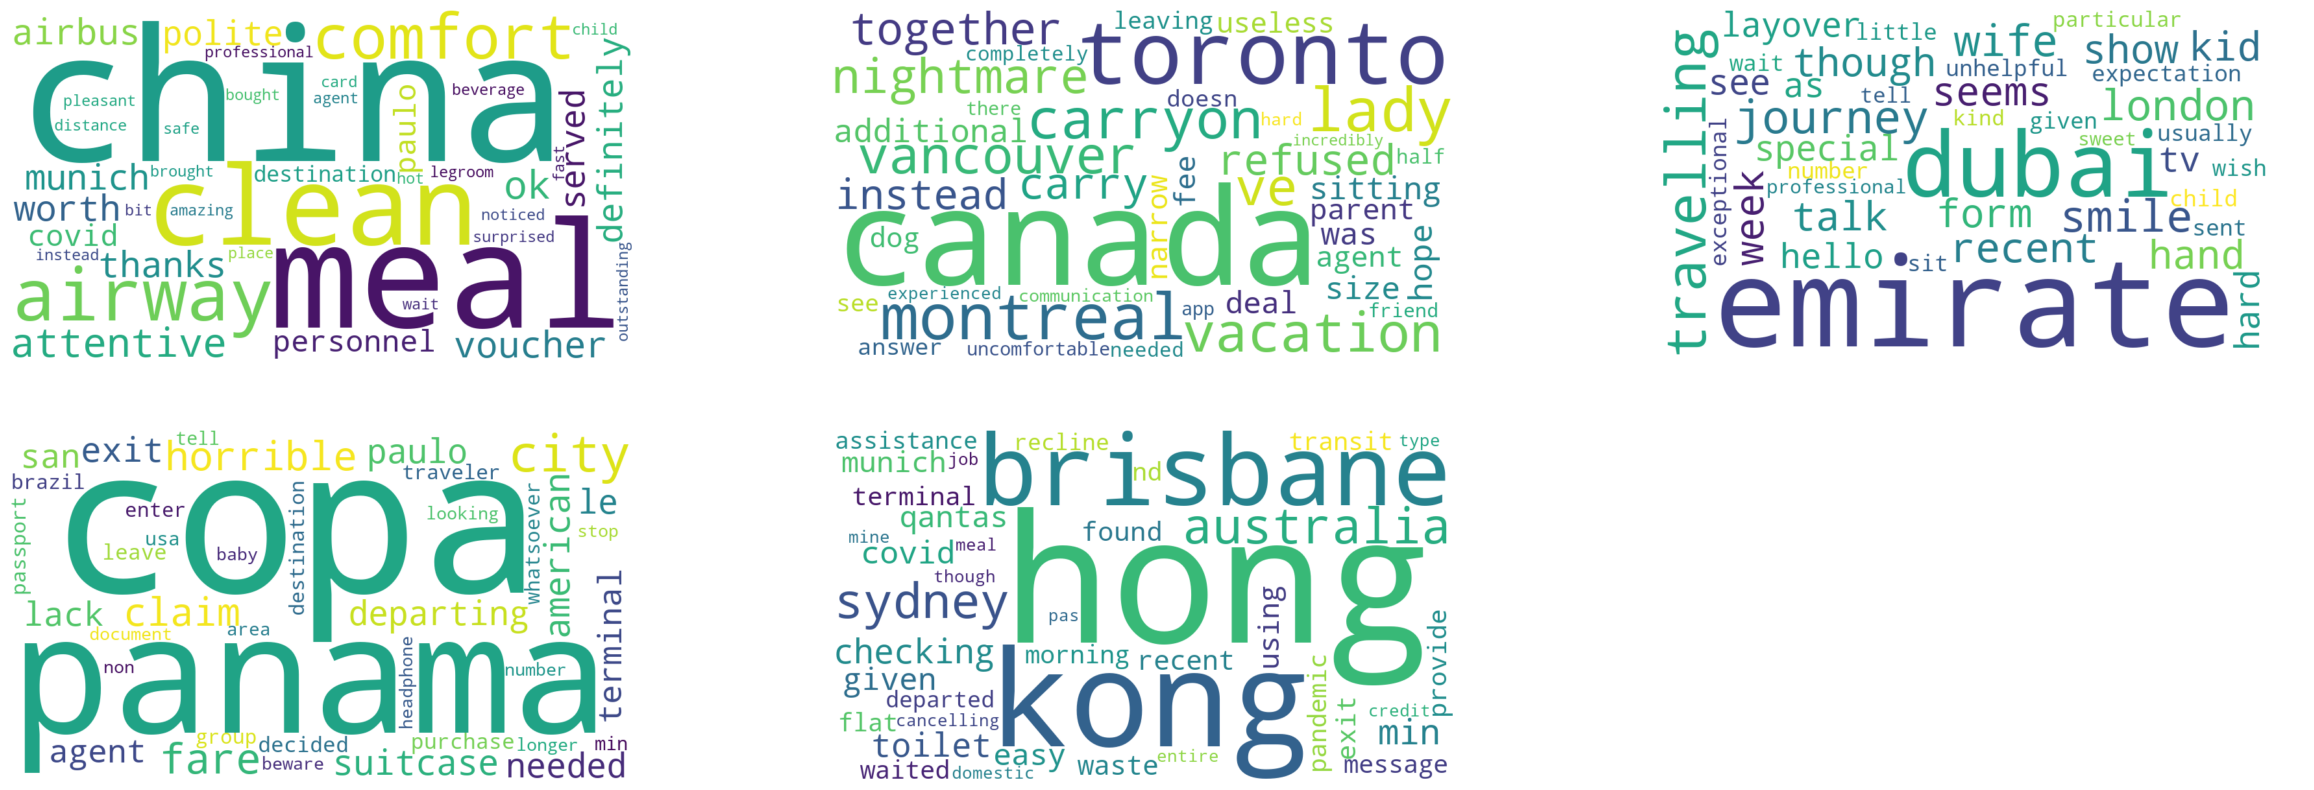

In [31]:
wordcloud_topics(nmf_summary_model, tfidf_summary_vectorizer.get_feature_names_out())

*LDA WordCloud*

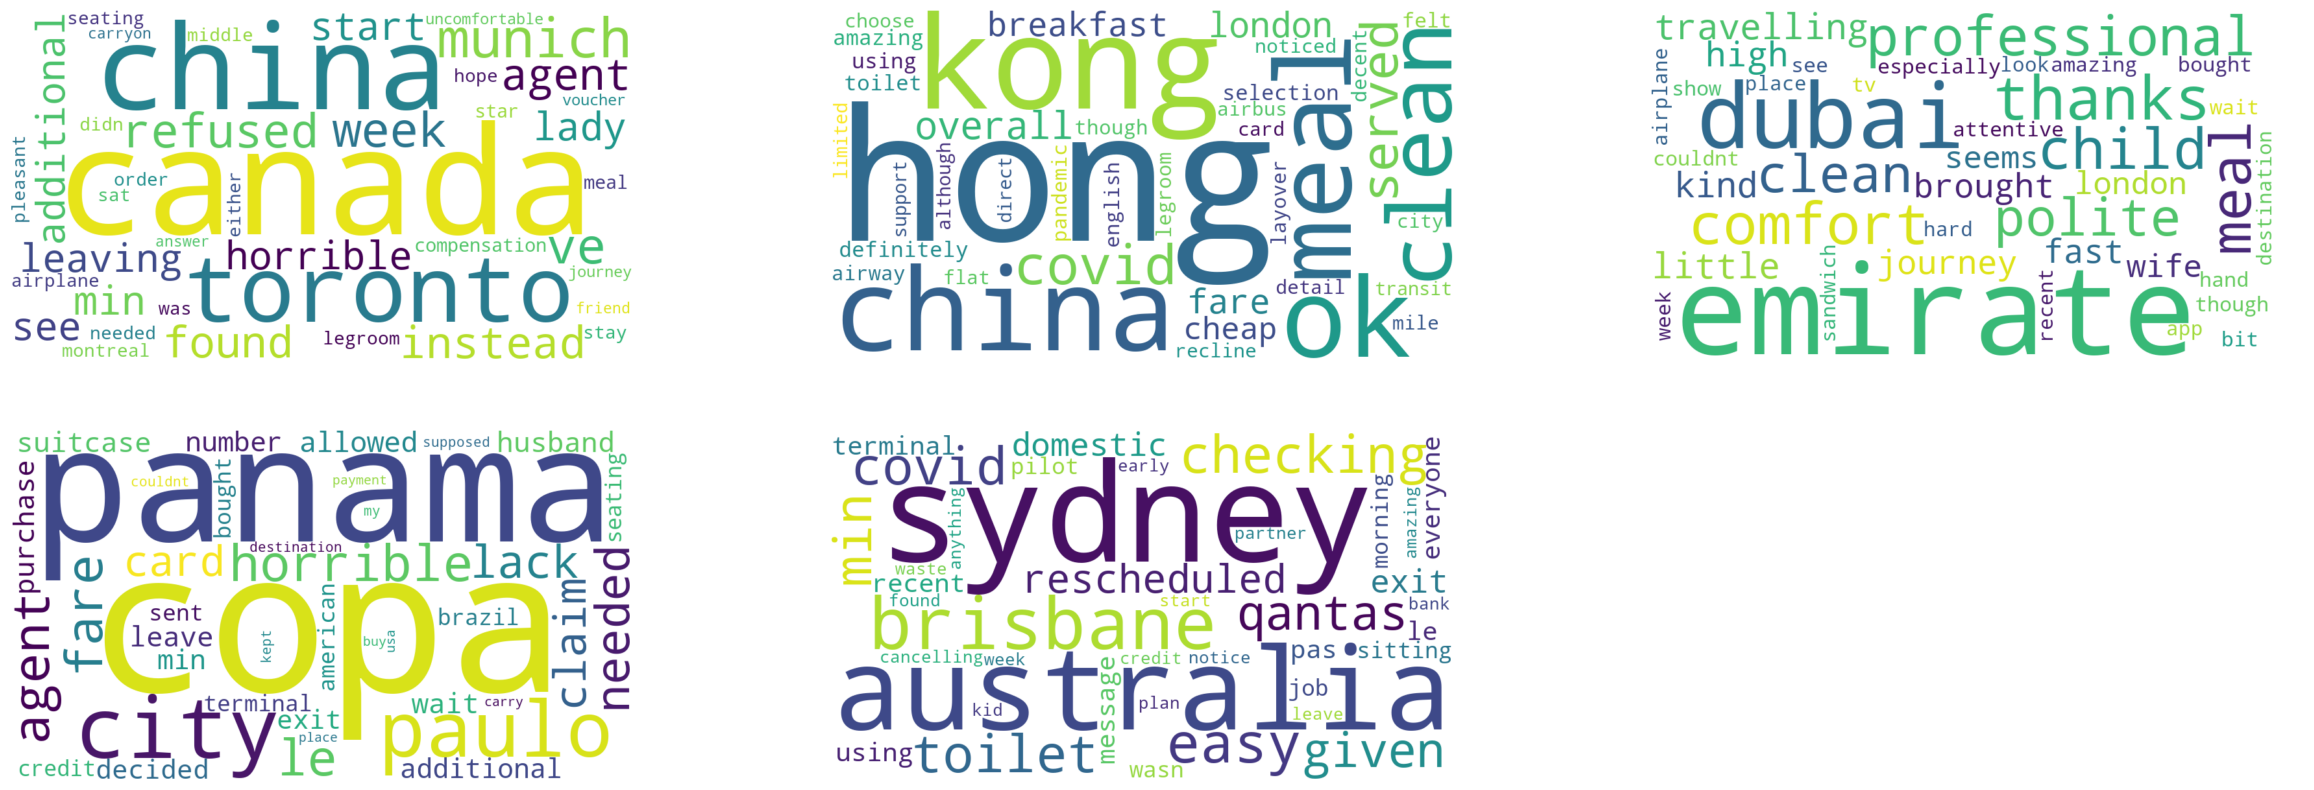

In [32]:
wordcloud_topics(lda_model, count_summary_vectorizer.get_feature_names_out())

### Splitting into Test / Train Sets

In [33]:
airlines_df.loc[(airlines_df['Rating'] >= 4.5), 'score'] = 5
airlines_df.loc[(airlines_df['Rating'] >= 4) & (airlines_df['Rating'] < 4.5), 'score'] = 4
airlines_df.loc[(airlines_df['Rating'] >= 3) & (airlines_df['Rating'] < 4), 'score'] = 3
airlines_df.loc[(airlines_df['Rating'] >= 2) & (airlines_df['Rating'] < 3), 'score'] = 2
airlines_df.loc[(airlines_df['Rating'] < 2), 'score'] = 1

In [34]:
# Identify dependent and independent variables

X = airlines_df['summary_lemma_str']
y = airlines_df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

The dataset is split with 80% of the data allocated toward training the models and 20% of the data to be used for testing.

### Text Classification Models

In [35]:
tfidf = TfidfVectorizer()
SVC = LinearSVC(random_state=42)

#pipe for the SVC Prediction
pipe = make_pipeline(tfidf,SVC) # from sklearn.pipeline import make_pipeline

pipe.fit(list(X_train),list(y_train))

#pipe for Random Forest
RFC = RandomForestClassifier()

pipe_2 = make_pipeline(tfidf, RFC)

pipe_2.fit(list(X_train),list(y_train))

NB = MultinomialNB()

pipe_3 = make_pipeline(tfidf, NB)

pipe_3.fit(list(X_train),list(y_train))

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

Three different text classification models were trained, including LinearSVC, Random Forest, and Naive Bayes.

In [36]:
SVC_predicted = pipe.predict(list(X_test))
print(metrics.classification_report(list(y_test), SVC_predicted))

SVC_accuracy = accuracy_score(list(y_test), SVC_predicted)

              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [37]:
RFC_predicted = pipe_2.predict(list(X_test))
print(metrics.classification_report(list(y_test), RFC_predicted))
RFC_accuracy = accuracy_score(list(y_test), RFC_predicted)

              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [38]:
NB_predicted = pipe_3.predict(list(X_test))
print(metrics.classification_report(list(y_test), NB_predicted))
NB_accuracy = accuracy_score(list(y_test), NB_predicted)

              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [39]:
Model_Eval = {'Model': ['Linear SVC', 'Random Forest', 'Multinomial Naive Bayes'], 'Accuracy': [SVC_accuracy, RFC_accuracy, NB_accuracy]}

Model_Eval = pd.DataFrame(Model_Eval)
Model_Eval.Accuracy = Model_Eval.Accuracy.round(3)
Model_Eval

Model  Accuracy
0               Linear SVC       1.0
1            Random Forest       1.0
2  Multinomial Naive Bayes       1.0

Model evaluation was based on the performance metrics displayed above. Apparently all of the models had steallar performance. Although it is possible we did a really good job classifying airline ratings, it more likely suggests that more work needs to be done with our text classification models.